In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from scipy import signal
from scipy.io import wavfile

from IPython.display import Audio, display

%matplotlib inline

In [6]:
#Normalization Function
def norm(wav):
    return wav/np.max(np.abs(wav))

In [99]:
fname = 'AMDEMOD-N6GN_20211115T190749_iq_15.wav'
fs_wav0, wav0 = wavfile.read(fname)

t_wav0 = np.arange(len(wav0))*(1/fs_wav0)

In [105]:
wav0

array([0.16711427, 0.16545844, 0.16372715, ..., 0.21338634, 0.21290314,
       0.21029644], dtype=float32)

In [107]:
mean = np.mean(wav0)
DCO1 = wav0 - mean
DCO1

array([-0.00292346, -0.00457929, -0.00631058, ...,  0.04334861,
        0.04286541,  0.04025871], dtype=float32)

In [108]:
mean

0.17003773

In [109]:
#DC OFFSET FUNCTION
def DCO(wav):
    return (wav - (np.mean(wav)))

In [110]:
wav1 = DCO(wav0)

In [111]:
wav1

array([-0.00292346, -0.00457929, -0.00631058, ...,  0.04334861,
        0.04286541,  0.04025871], dtype=float32)

In [112]:
def plot_signal(time_vec,x_0,xlim=None,title=None):
    fig = plt.figure(figsize=(15,12))

    ax = fig.add_subplot(2,1,1)
    ax.plot(time_vec,x_0)
    ax.set_xticklabels([])
    ax.set_ylabel('x(t)')
    ax.set_xlim(xlim)
    ax.set_title(title)

    ax = fig.add_subplot(2,1,2)
    samplerate = 1./(time_vec[1]-time_vec[0])
    ax.specgram(x_0,Fs=samplerate)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Hz')
    ax.set_xlim(xlim)

    fig.tight_layout()
    plt.show()
    plt.close(fig)

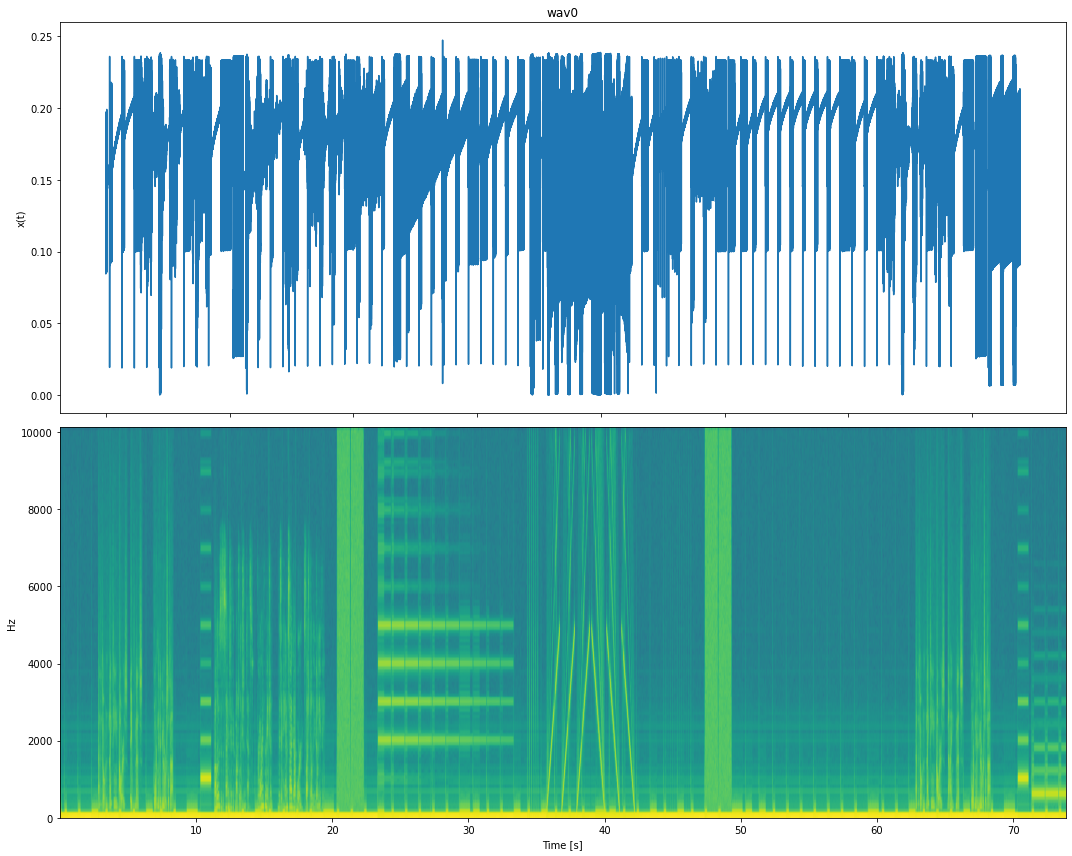

In [113]:
plot_signal(t_wav0, wav0, title="wav0")

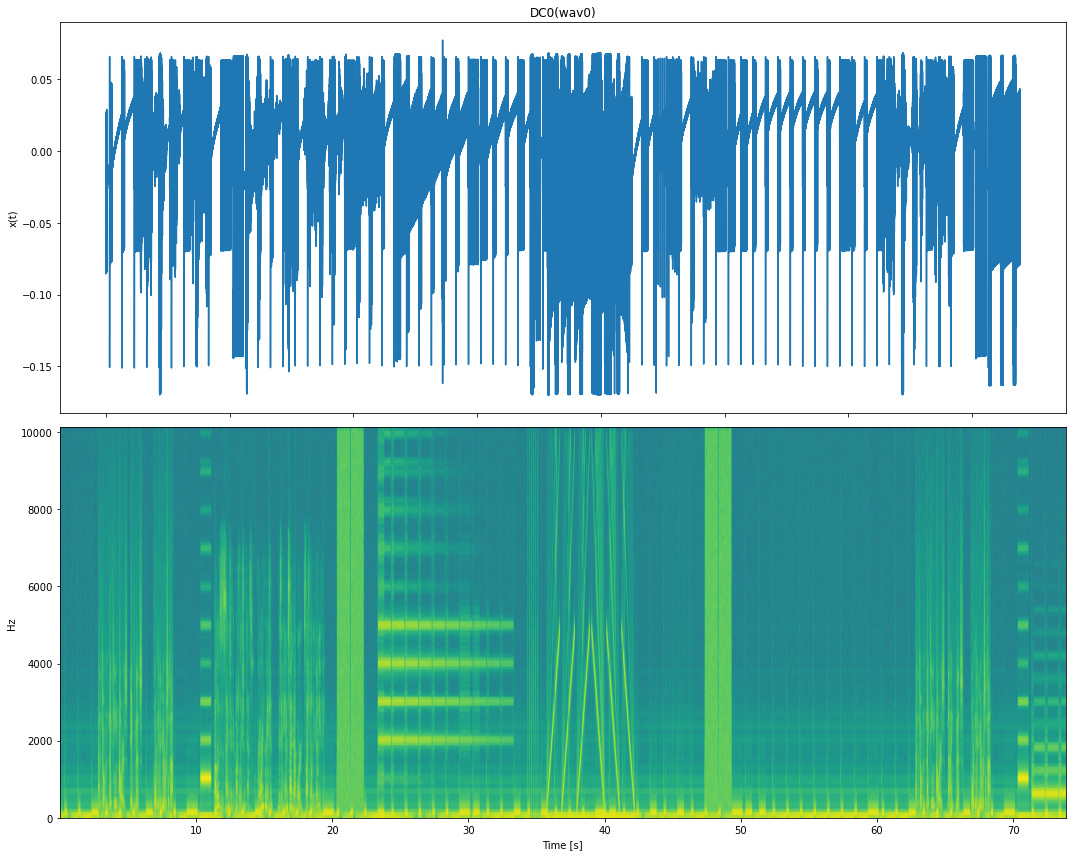

In [114]:
plot_signal(t_wav0, wav1, title="DC0(wav0)")